In [1]:
#Import standard data processing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Seaborn is a data visualization library built on matplotlib
import seaborn as sns

#Set the plotting style
sns.set_style("whitegrid")

In [53]:
#Read Excel and CSV data
edgap = pd.read_excel('..\data\EdGap_data.xlsx')
scores = pd.read_csv('..\data\ccd_sch_029_1617_w_1a_11212017.csv', encoding="unicode_escape", low_memory=False)

c:\Users\hrvel\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning:

Unknown extension is not supported and will be removed



In [3]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   int64  
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


The EdGap data contains just under 8 thousand entries for schools across the US that chose to share the requested economic data. The primary key for this data set is the NCESSCH ID.

In [4]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

The ACT and SAT scores have been reported by every school in the US which gives us over 100 thousand entries in this CSV. This data set also uses NCESSCH ID as a primary key, and can be used to join the two.

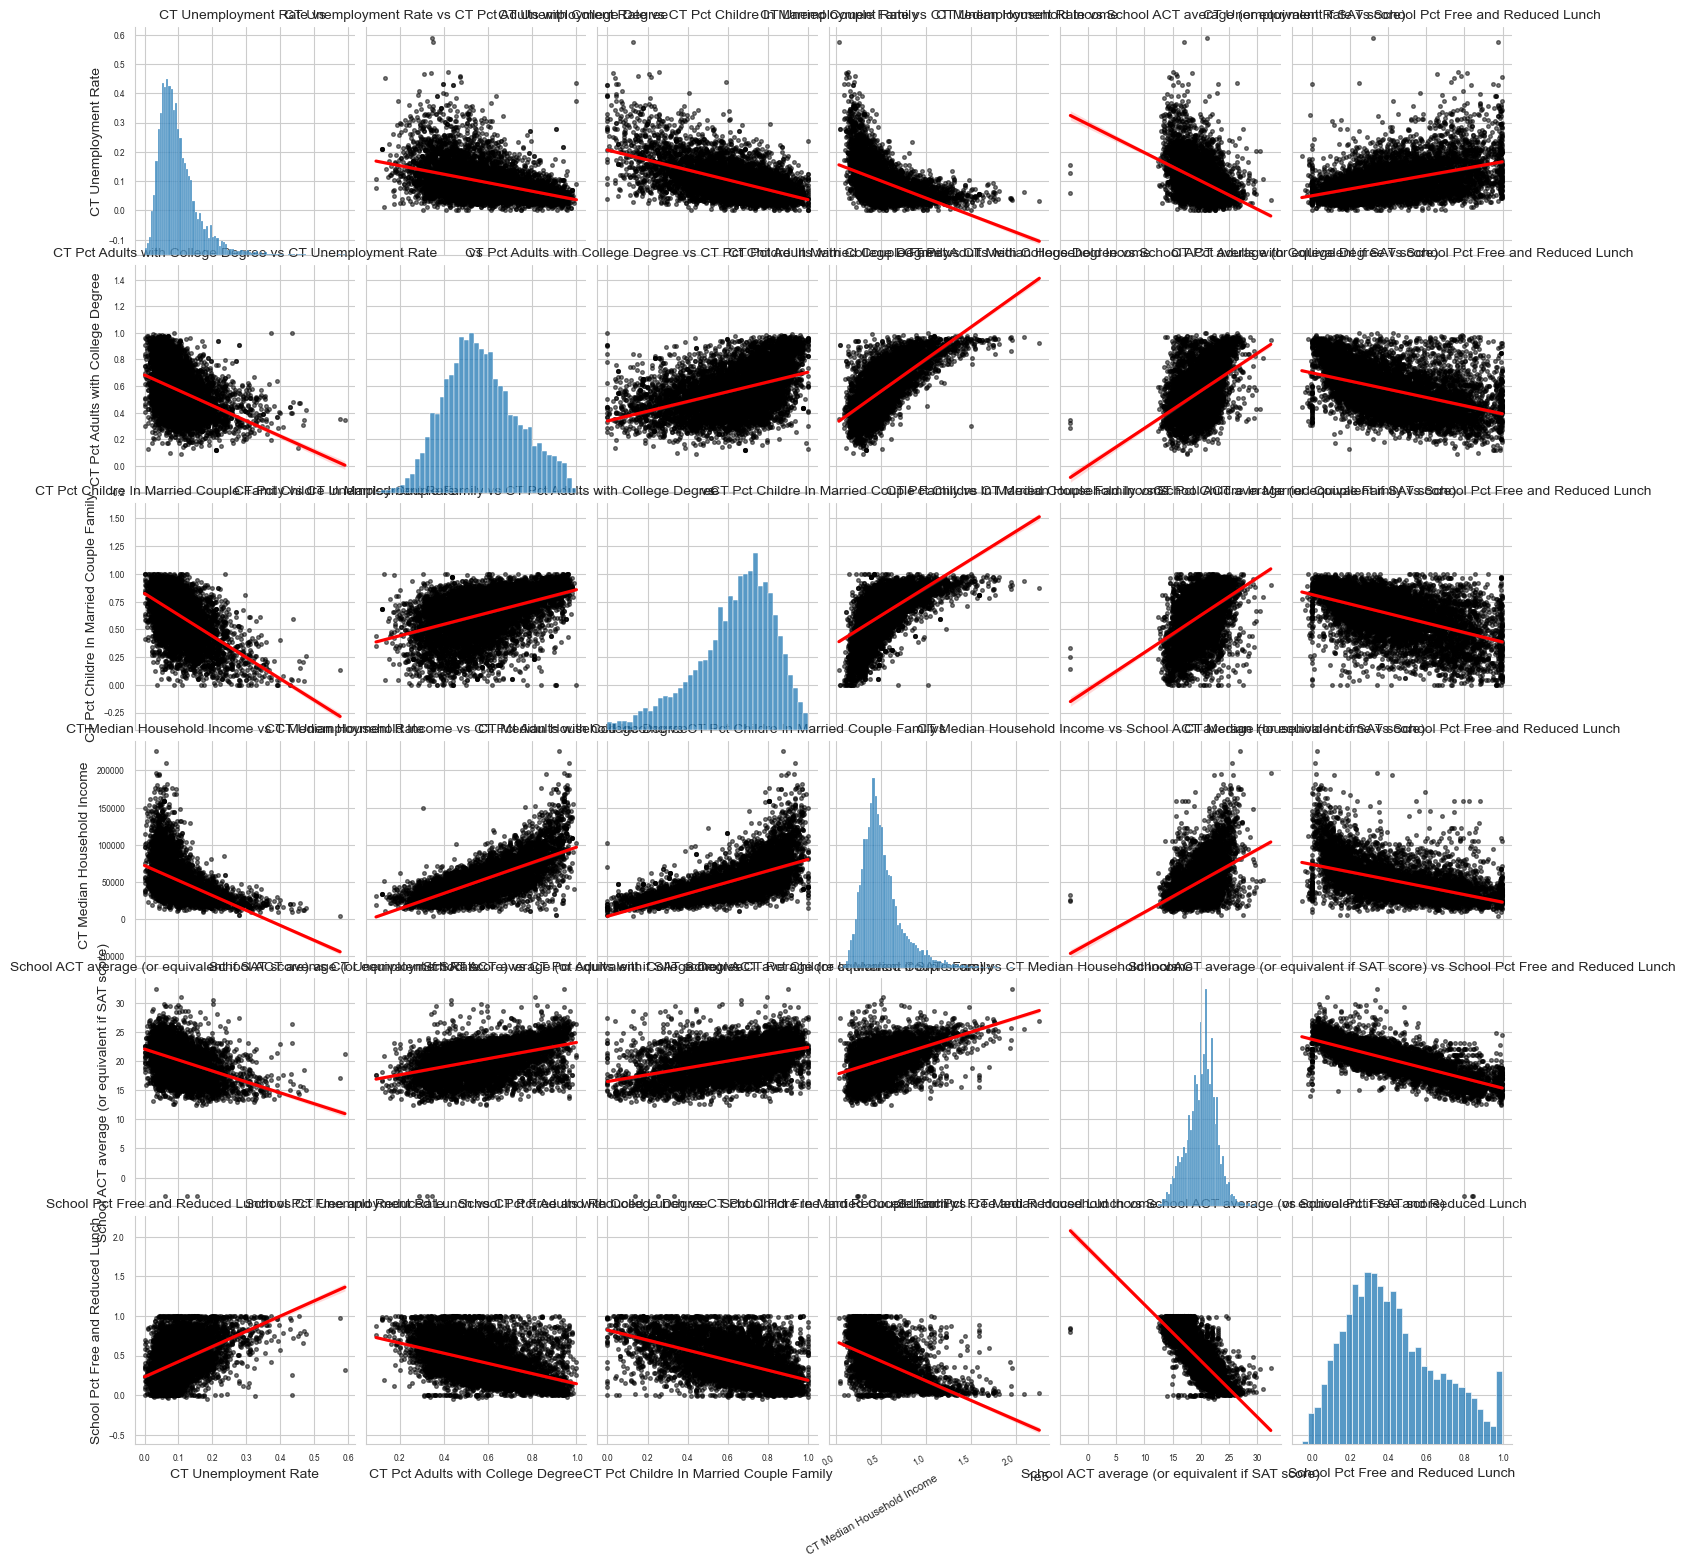

In [ ]:
## Plot pairplot for all columns, excluding the school ID for clarity, to visualize relationships between variables for both datasets

fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    kind="reg",
    plot_kws={
            "line_kws":{"color":"red"},
            "scatter_kws":{"alpha":0.5, "color": "k", "s":7},
    },
)
for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) #Apply scientific notation
        ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation=30, ha='right') #X-axis label and size rotation
        ax.set_ylabel(ax.get_ylabel(), fontsize = 8) #Y-axis label size

        plt.setp(ax.get_xticklabels(), rotation = 30, ha='right') #Rotate X-axis tick labels
plt.show()

This pairplot provides a general overview of the two dataframes and how they correlate with each other. At a glance, there are several significant outliers that need to be addressed, but we're able to see the positive and negative correlations for each demographic datapoint.

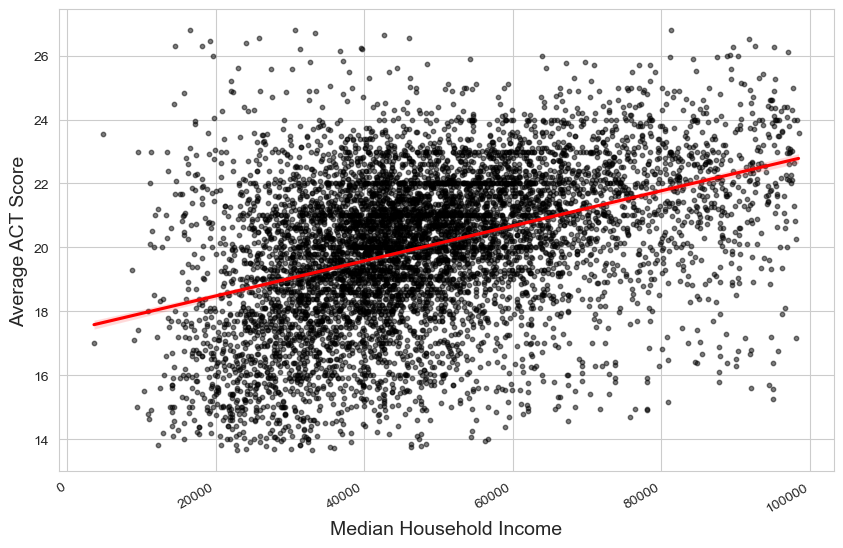

In [ ]:
## Scatter plot with regression line to visualize the relationship between median household income and average ACT score more closely without outliers

# Remove outliers using IQR for both columns
income_q1 = edgap['CT Median Household Income'].quantile(0.25)
income_q3 = edgap['CT Median Household Income'].quantile(0.75)
income_iqr = income_q3 - income_q1

act_q1 = edgap['School ACT average (or equivalent if SAT score)'].quantile(0.25)
act_q3 = edgap['School ACT average (or equivalent if SAT score)'].quantile(0.75)
act_iqr = act_q3 - act_q1

# Filtered EdGap DataFrame without outliers
filtered_edgap = edgap[
    (edgap['CT Median Household Income'] >= income_q1 - 1.5 * income_iqr) &
    (edgap['CT Median Household Income'] <= income_q3 + 1.5 * income_iqr) &
    (edgap['School ACT average (or equivalent if SAT score)'] >= act_q1 - 1.5 * act_iqr) &
    (edgap['School ACT average (or equivalent if SAT score)'] <= act_q3 + 1.5 * act_iqr)
]

# Scatter plot with regression line after removing outliers
plt.figure(figsize=(10, 6))
sns.regplot(
    data=filtered_edgap,
    x='CT Median Household Income',
    y='School ACT average (or equivalent if SAT score)',
    scatter_kws={'alpha':0.5, 'color':'k', 's':10},
    line_kws={'color':'red'}
)
plt.xlabel('Median Household Income', fontsize=14)
plt.ylabel('Average ACT Score', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.show()

In [ ]:
# Extract relevant school information from the scores dataframe
school_information = scores[
    ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
    ]
school_information.head()

,SCHOOL_YEAR,NCESSCH,LSTATE,LZIP,SCH_TYPE_TEXT,LEVEL,CHARTER_TEXT
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


In [ ]:
# Rename columns in EdGap dataframe for clarity and consistency
edgap = edgap.rename(
    columns={
        "NCESSCH School ID":"id"
        , "CT Pct Adults with College Degree":"percent_college"
        , "CT Unemployment Rate":"rate_unemployment"
        , "CT Pct Childre In Married Couple Family":"percent_married"
        , "CT Median Household Income":"median_income"
        , "School ACT average (or equivalent if SAT score)":"average_act"
        , "School Pct Free and Reduced Lunch":"percent_lunch"
    }
)

In [ ]:
# Verify new column names
edgap.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [ ]:
# Rename columns in school information dataframe for clarity and consistency
school_information = school_information.rename(
    columns={
        "SCHOOL_YEAR":"year"
        , "NCESSCH":"id"
        , "LSTATE":"state"
        , "LZIP":"zip_code"
        , "SCH_TYPE_TEXT":"school_type"
        , "LEVEL":"school_level"
        , "CHARTER_TEXT":"charter"
    }
)

In [ ]:
# Cast school ID to object type for to enable merging with EdGap dataframe
school_information['id'] = school_information['id'].astype('object')

In [ ]:
# Verify new column names and ID type
school_information.head()

,year,id,state,zip_code,school_type,school_level,charter
0,2016-2017,10000200277.0,AL,35220,Alternative School,High,No
1,2016-2017,10000201667.0,AL,36067,Alternative School,High,No
2,2016-2017,10000201670.0,AL,36784,Alternative School,High,No
3,2016-2017,10000201705.0,AL,36057,Alternative School,High,No
4,2016-2017,10000201706.0,AL,35206,Alternative School,High,No


In [ ]:
# Merge EdGap dataframe with school information dataframe on school ID
df = edgap.merge(
    school_information,
    how='left',
    on='id'
)

In [ ]:
# Verify merged dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
dtypes: float64(6), object(7)
memory usage: 811.2+ KB


In addition to the school-level data files, the NCES provides a set of files that contain estimates of the economic characteristics of the families of public school students. These files are part of the NCES Education Demographic and Geographic Estimates (EDGE) program. The EDGE program uses data from the American Community Survey (ACS) to produce estimates of the economic characteristics of families with children enrolled in public schools. The EDGE program produces estimates for all public schools in the 50 states and Washington DC. 
The estimates reflect the income-to poverty ratio (IPR), which is the percentage of family income that is above or below the federal poverty threshold set for the family’s size and structure. The IPR indicator ranges from 0 to 999. Lower IPR values indicate a greater degree of poverty. Each file includes IPR estimates and standard errors for approximately 100,000 public school locations in the 50 states and Washington DC. 

In [ ]:
# Load poverty level data
ipr_level = pd.read_csv('..\data\EDGE_poverty_estimates.csv', encoding="unicode_escape")

In [ ]:
# Rename NCESSCH to id for consistency and to enable merging
ipr_level = ipr_level.rename(columns={'NCESSCH':'id'})

In [ ]:
# Verify column names and data structure
ipr_level.head()

,id,NAME,IPR_EST,IPR_SE
0,10000200277,Sequoyah Sch - Chalkville Campus,252,112
1,10000201667,Camps,217,71
2,10000201670,Det Ctr,290,77
3,10000201705,Wallace Sch - Mt Meigs Campus,267,78
4,10000201706,McNeel Sch - Vacca Campus,172,56


In [ ]:
# Merge the combined EdGap and school information dataframe with the poverty level data on school ID
df_ipr = df.merge(
    ipr_level,
    how='left',
    on='id'
)

In [ ]:
# Verify final merged dataframe structure and data types
df_ipr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
 13  NAME               7898 non-null   object 
 14  IPR_EST            7898 non-null   float64
 15  IPR_SE             7898 non-null   float64
dtypes: float64(8), object(8)

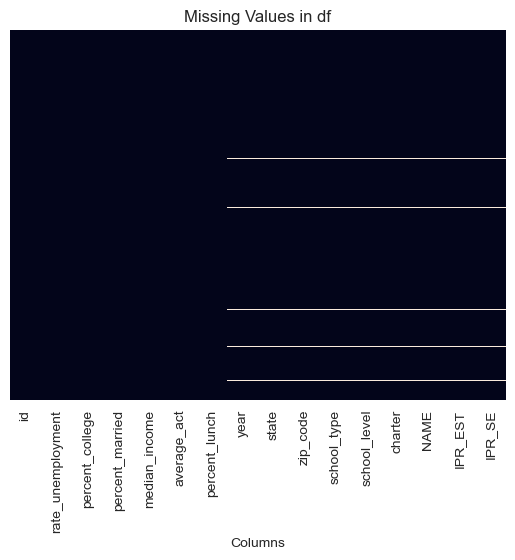

In [ ]:
# Visualize missing values in the final dataframe
sns.heatmap(df_ipr.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values in df")
plt.xlabel("Columns")
plt.show()

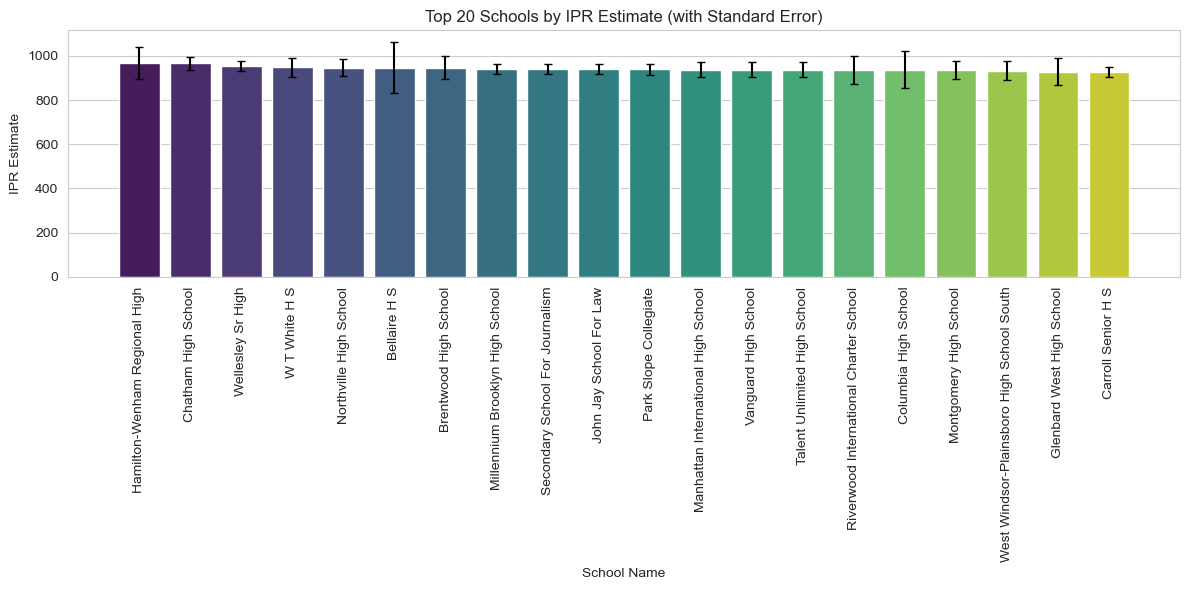

In [ ]:
## Plot IPR estimates with standard error bars for the top 20 schools by IPR estimate

# Calculate IPR Standard Error (SE) by school ID and plot IPR estimates with school names
df_ipr_sorted = df_ipr.sort_values('IPR_EST', ascending=False).head(20)  # Top 20 schools by IPR estimate
df_ipr_sorted['IPR_EST'] = pd.to_numeric(df_ipr_sorted['IPR_EST'], errors='coerce') # Convert to numeric, coercing errors to NaN
df_ipr_sorted['IPR_SE'] = pd.to_numeric(df_ipr_sorted['IPR_SE'], errors='coerce') # Convert to numeric, coercing errors to NaN
df_ipr_sorted['NAME'] = df_ipr_sorted['NAME'].str.title() # Title case for school names

# Plot bar chart with error bars
plt.figure(figsize=(12,6))
sns.barplot(x='NAME', y='IPR_EST', data=df_ipr_sorted, palette='viridis', hue='NAME')
plt.errorbar(x=range(len(df_ipr_sorted)), y=df_ipr_sorted['IPR_EST'], yerr=df_ipr_sorted['IPR_SE'], fmt='none', ecolor='black', capsize=3)
plt.xticks(ticks=range(len(df_ipr_sorted)), labels=df_ipr_sorted['NAME'], rotation=90)
plt.xlabel('School Name')
plt.ylabel('IPR Estimate')
plt.title('Top 20 Schools by IPR Estimate (with Standard Error)')
plt.tight_layout()
plt.show()

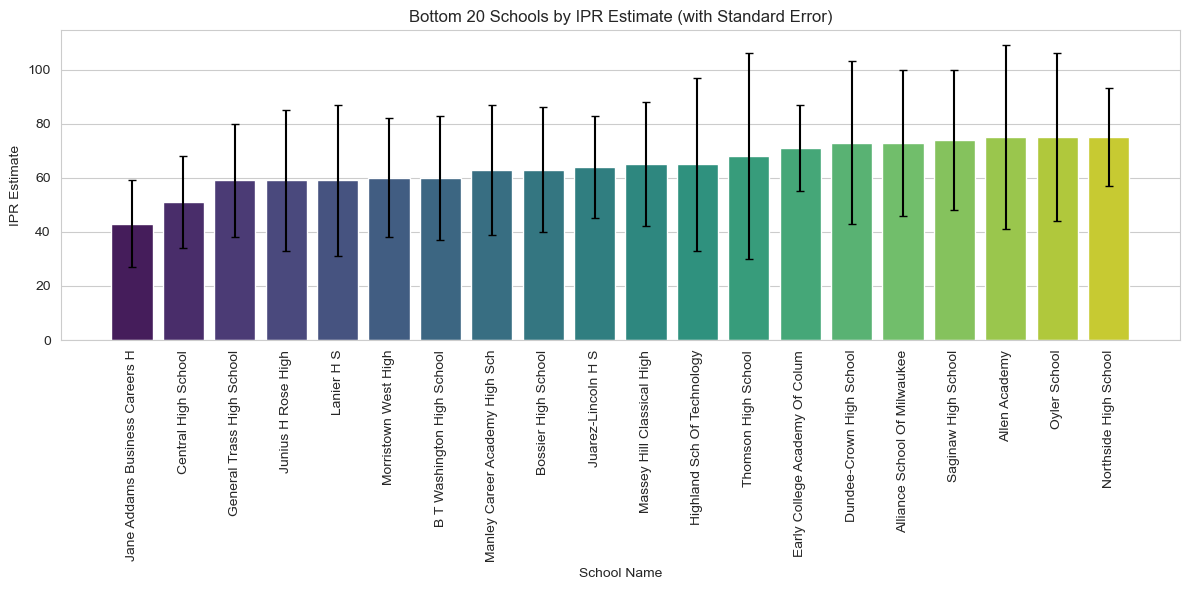

In [ ]:
## Plot IPR estimates with standard error bars for the bottom 20 schools by IPR estimate

# Plot the bottom 20 schools by IPR estimate (excluding NULLs), with standard error whiskers and truncated names
df_ipr_sorted['IPR_EST'] = pd.to_numeric(df_ipr_sorted['IPR_EST'], errors='coerce') # Convert to numeric, coercing errors to NaN
df_ipr_sorted['IPR_SE'] = pd.to_numeric(df_ipr_sorted['IPR_SE'], errors='coerce') # Convert to numeric, coercing errors to NaN
df_ipr_sorted['NAME'] = df_ipr_sorted['NAME'].str.title().str.slice(0, 30)  # Title case and truncate school names to 30 characters
df_ipr_sorted = df_ipr_sorted[df_ipr_sorted['IPR_EST'].notnull()] # Exclude rows with NULL IPR estimates
df_ipr_bottom20 = df_ipr_sorted.nsmallest(20, 'IPR_EST') # Bottom 20 schools by IPR estimate

# Plot bar chart with error bars
plt.figure(figsize=(12,6))
sns.barplot(x='NAME', y='IPR_EST', data=df_ipr_bottom20, palette='viridis', hue='NAME')
plt.errorbar(x=range(len(df_ipr_bottom20)), y=df_ipr_bottom20['IPR_EST'], yerr=df_ipr_bottom20['IPR_SE'], fmt='none', ecolor='black', capsize=3)
plt.xticks(ticks=range(len(df_ipr_bottom20)), labels=df_ipr_bottom20['NAME'], rotation=90)
plt.xlabel('School Name')
plt.ylabel('IPR Estimate')
plt.title('Bottom 20 Schools by IPR Estimate (with Standard Error)')
plt.tight_layout()
plt.show()

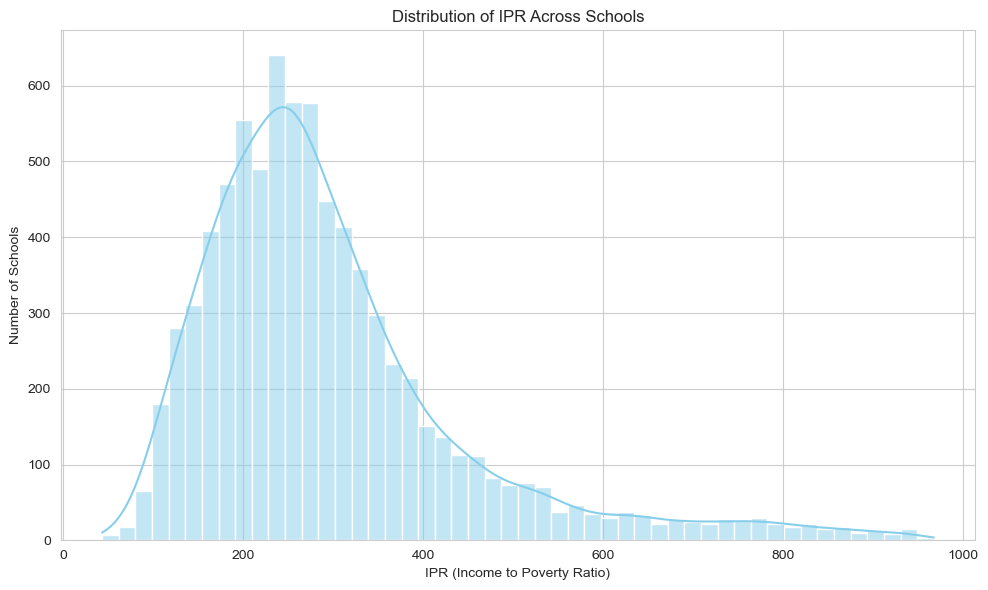

In [ ]:
## Create a visual overview for the distribution of IPR estimates across all schools

# Plot histogram of IPR estimates
plt.figure(figsize=(10,6))
sns.histplot(df_ipr['IPR_EST'], bins=50, kde=True, color='skyblue')
plt.xlabel('IPR (Income to Poverty Ratio)')
plt.ylabel('Number of Schools')
plt.title('Distribution of IPR Across Schools')
plt.tight_layout()
plt.show()

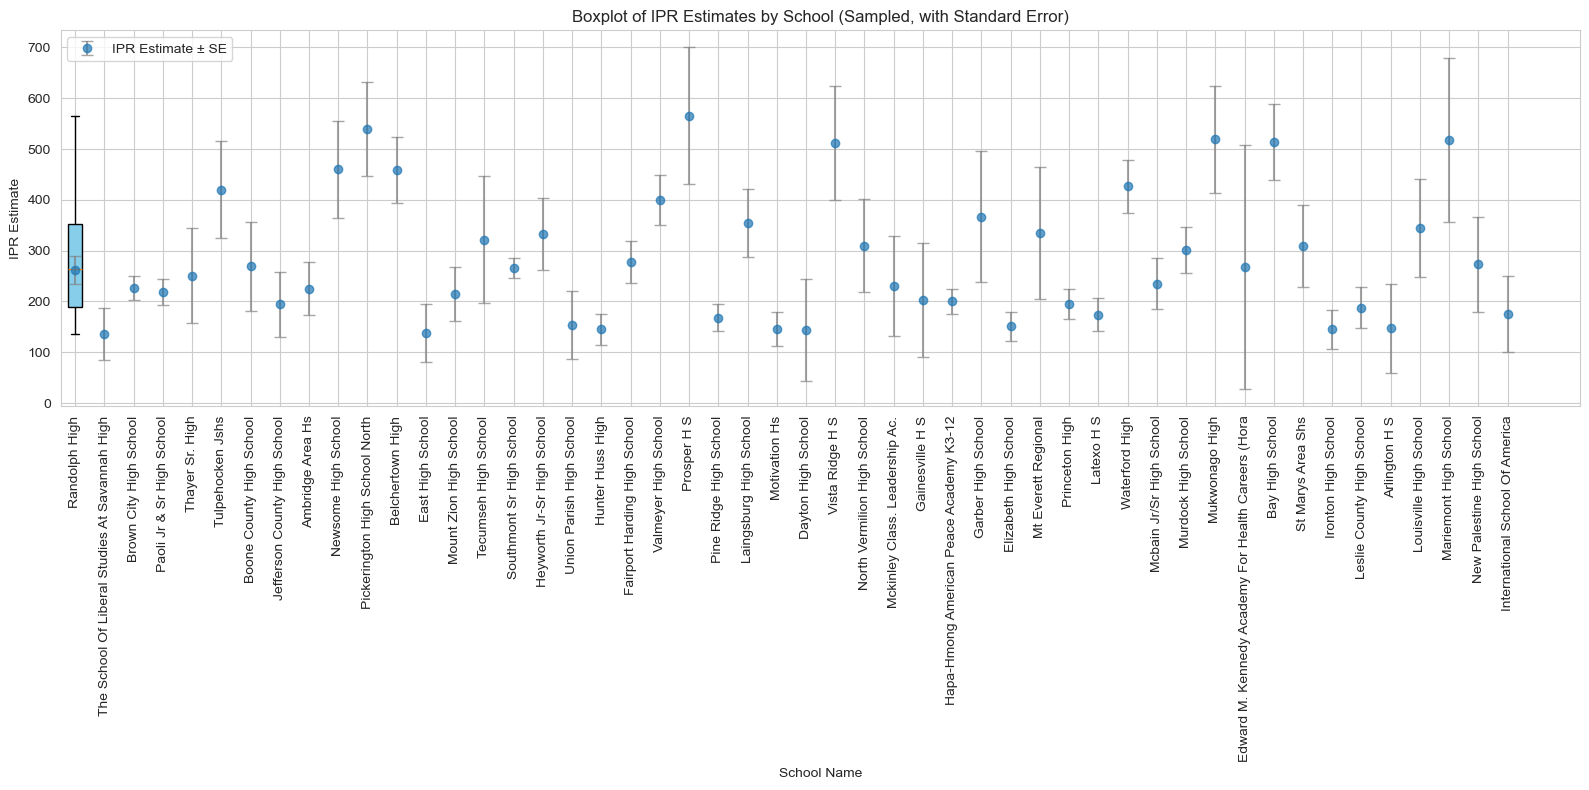

In [ ]:
# Boxplot of IPR estimates by school (sampled for clarity, excluding NULLs), with standard error as whiskers
boxplot_sample = df_ipr.copy()
boxplot_sample['IPR_EST'] = pd.to_numeric(boxplot_sample['IPR_EST'], errors='coerce') # Convert to numeric, coercing errors to NaN
boxplot_sample['IPR_SE'] = pd.to_numeric(boxplot_sample['IPR_SE'], errors='coerce') # Convert to numeric, coercing errors to NaN
boxplot_sample['NAME'] = boxplot_sample['NAME'].str.title().str.slice(0, 50) # Title case and truncate school names to 50 characters
boxplot_sample = boxplot_sample[boxplot_sample['IPR_EST'].notnull()] # Exclude rows with NULL IPR estimates
boxplot_sample = boxplot_sample.sample(n=50, random_state=42) # Random sample of 50 schools for clarity

# Plot boxplot with error bars
plt.figure(figsize=(16,8))
positions = range(len(boxplot_sample))
plt.boxplot(boxplot_sample['IPR_EST'], positions=[0], widths=0.5, vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.errorbar(x=positions, y=boxplot_sample['IPR_EST'], yerr=boxplot_sample['IPR_SE'], fmt='o', ecolor='gray', capsize=4, markersize=6, alpha=0.7, label='IPR Estimate ± SE')
plt.xticks(positions, boxplot_sample['NAME'], rotation=90)
plt.xlabel('School Name')
plt.ylabel('IPR Estimate')
plt.title('Boxplot of IPR Estimates by School (Sampled, with Standard Error)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Final data cleaning: Replace invalid values with NaN for percent_lunch and average_act columns
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

In [ ]:
# View counts of different school types
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [ ]:
# View counts of different school levels
df['school_level'].value_counts()  

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [ ]:
# View counts of charter vs non-charter schools
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

In [ ]:
# Limit the dataframe to only look at reporting high schools
df = df.loc[df['school_level'] == 'High']

In [ ]:
# Check for duplicate rows in the dataframe
df.duplicated().sum()

np.int64(0)

In [ ]:
# View total missing values by column
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
year,0
state,0
zip_code,0


In [ ]:
# View counts of different states in the dataframe
df['state'].value_counts()  

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [ ]:
# Import Plotly for interactive visualizations
import plotly.offline as po
import plotly.graph_objs as pg

In [ ]:
# Create a heatmap of school counts by state
layout = dict(
    geo ={"scope":"usa"}, coloraxis_colorbar=dict(title="Number of Schools")
)
data = dict(
    type = "choropleth",
    locations = df['state'].value_counts().index,
    locationmode = 'USA-states',
    z=df['state'].value_counts().values,
    coloraxis="coloraxis",
)
x = pg.Figure(data=[data], layout=layout)
po.iplot(x)

In [ ]:
# Remove rows with missing average ACT scores for analysis
df = df.dropna(subset='average_act')

In [ ]:
# View total missing values by column, verify all missing values for average_act have been removed
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,0
percent_lunch,20
year,0
state,0
zip_code,0


In [57]:
# Create a list of predictor variables for modeling
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter'
]

In [ ]:
# Import IterativeImputer for imputation (insertion) of missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()

In [ ]:
# Identify numerical predictor variables for imputation
numerical_predictors = df[predictor_variables].select_dtypes(include=['number']).columns.to_list()
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


In [ ]:
# Fit the imputer on the numerical predictor variables and transform the data to fill in missing values
imputer.fit(df[numerical_predictors])
df[numerical_predictors] = imputer.transform(df[numerical_predictors])

In [ ]:
# Verify final dataframe contains no missing values
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
year,0
state,0
zip_code,0


In [ ]:
# Export cleaned dataframe to CSV for modeling
df.to_csv('../data/cleaned_education_data.csv', encoding='utf-8-sig', index=False)